### 1. Придумаем архитектуру свёрточной сети для решения задачи классификации на наборе данных MNIST. Обучим и протестируем её. Построим кривую обучения. Сохраним полученные параметры.

#### Нормализуем.

In [21]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

#### Создадим шаблон модели

In [22]:
def generate_model():
    model = tf.keras.Sequential(
        [
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(10, activation='softmax')
        ]
    )
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model



In [23]:
model = generate_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 576)              

#### Обучение модели.

#### Зададим параметры

In [24]:
batch_size = 128
epochs = 5

In [25]:
class ValidationCallback(tf.keras.callbacks.Callback):
    def __init__(self, val_images, val_labels, val_batch_size=128):
        super().__init__()
        self.images = val_images
        self.labels = val_labels
        self.callback_batch_size = val_batch_size
        self.losses = []
        self.accuracies = []
        self.test_losses = []

    def on_train_batch_end(self, epoch, logs=None):
        batch_amount = (10000 // self.callback_batch_size)
        if epoch != 0 and epoch % batch_amount == 0 and logs is not None:
            val_loss, val_acc = self.model.evaluate(self.images, self.labels, verbose=0)
            print(f'\nloss: {val_loss}, accuracy: {val_acc}')
            #test_loss, test_acc = self.model.evaluate(test_images, test_labels, verbose=0)
            self.losses.append(val_loss)
            self.accuracies.append(val_acc)
            #self.test_losses.append(test_loss)

test_callback = ValidationCallback(test_images, test_labels)
model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, callbacks=[test_callback])

Epoch 1/5
 78/469 [===>..........................] - ETA: 1:56 - loss: 0.8379 - accuracy: 0.7681
loss: 0.26246753334999084, accuracy: 0.9207000136375427
156/469 [========>.....................] - ETA: 1:35 - loss: 0.2503 - accuracy: 0.9235
loss: 0.14593791961669922, accuracy: 0.95660001039505
234/469 [=============>................] - ETA: 1:08 - loss: 0.1532 - accuracy: 0.9541
loss: 0.11816131323575974, accuracy: 0.961899995803833
312/469 [==================>...........] - ETA: 49s - loss: 0.1135 - accuracy: 0.9644
loss: 0.09099014848470688, accuracy: 0.9706000089645386
390/469 [=======================>......] - ETA: 25s - loss: 0.0934 - accuracy: 0.9696
loss: 0.07317357510328293, accuracy: 0.9765999913215637
468/469 [============================>.] - ETA: 0s - loss: 0.0779 - accuracy: 0.9754
loss: 0.0810413584113121, accuracy: 0.9754999876022339
469/469 [==============================] - 170s 341ms/step - loss: 0.0810 - accuracy: 0.9755
Epoch 2/5
 78/469 [===>........................

#### Тестируем модель.

In [26]:
#test_callback = ValidationCallback(test_images, test_labels)
model.evaluate(test_images, test_labels, verbose=2)

313/313 - 5s - loss: 0.0295 - accuracy: 0.9909 - 5s/epoch - 15ms/step


[0.029453467577695847, 0.9908999800682068]

#### Построим кривую обучения.

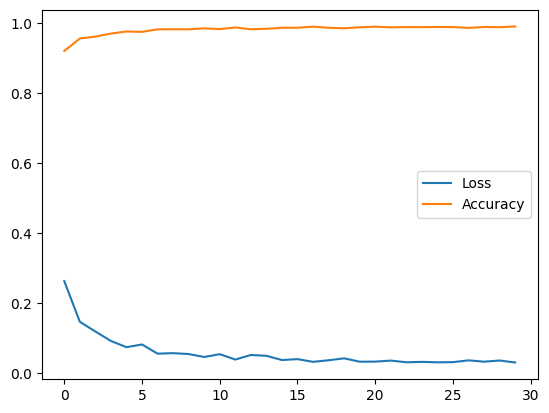

In [27]:
import matplotlib.pyplot as plt
plt.plot(test_callback.losses, label="Loss")
plt.plot(test_callback.accuracies, label="Accuracy")
#plt.plot(test_callback.test_losses, label="Test_loss")

plt.legend()

#### Сохранение полученных параметров.

In [28]:
SAVED_PARAMETERS = 'saved_parameters.h5'
model.save_weights(SAVED_PARAMETERS)

#### Проверим другую модель.

In [29]:
def generate_another_model():
    model = tf.keras.Sequential(
        [
        tf.keras.layers.Conv2D(16, (2, 2), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(32, (2, 2), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(10, activation='softmax')
        ]
    )
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model



In [30]:
model2 = generate_another_model()

model2_test_callback = ValidationCallback(test_images, test_labels)
model2.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, callbacks=[model2_test_callback])

Epoch 1/5
 78/469 [===>..........................] - ETA: 37s - loss: 1.2075 - accuracy: 0.6856
loss: 0.4823125898838043, accuracy: 0.857200026512146
156/469 [========>.....................] - ETA: 38s - loss: 0.4386 - accuracy: 0.8680
loss: 0.319591224193573, accuracy: 0.9089000225067139
234/469 [=============>................] - ETA: 32s - loss: 0.3116 - accuracy: 0.9105
loss: 0.25930315256118774, accuracy: 0.9253000020980835
312/469 [==================>...........] - ETA: 21s - loss: 0.2512 - accuracy: 0.9261
loss: 0.19645968079566956, accuracy: 0.9438999891281128
390/469 [=======================>......] - ETA: 10s - loss: 0.1995 - accuracy: 0.9428
loss: 0.18024525046348572, accuracy: 0.9456999897956848
468/469 [============================>.] - ETA: 0s - loss: 0.1721 - accuracy: 0.9489
loss: 0.13427135348320007, accuracy: 0.9609000086784363
469/469 [==============================] - 95s 134ms/step - loss: 0.1343 - accuracy: 0.9609
Epoch 2/5
 78/469 [===>..........................] 

In [31]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 27, 27, 16)        80        
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 12, 12, 32)        2080      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1152)              0         
                                                                 
 dense_3 (Dense)             (None, 10)               

In [32]:
model2.evaluate(test_images, test_labels, verbose=2)

313/313 - 3s - loss: 0.0581 - accuracy: 0.9806 - 3s/epoch - 11ms/step


[0.058144133538007736, 0.9805999994277954]

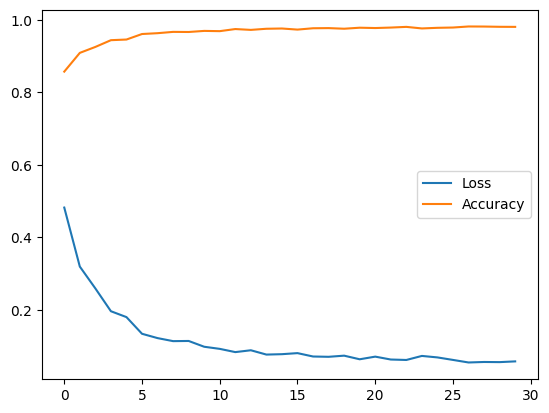

In [33]:
plt.plot(model2_test_callback.losses, label="Loss")
plt.plot(model2_test_callback.accuracies, label="Accuracy")
plt.legend()

### 2. Обучим и протестируем ту же самую архитектуру на наборе данных Fashion-MNIST. Построим кривую обучения.

In [34]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(fashion_train_images, fashion_train_labels), (fashion_test_images, fashion_test_labels) = fashion_mnist.load_data()

fashion_train_images = fashion_train_images.astype('float32') / 255.0
fashion_test_images = fashion_test_images.astype('float32') / 255.0

fashion_model = generate_model()

In [35]:
fashion_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_4 (Flatten)         (None, 576)              

#### Обучение модели.

In [36]:
fashion_test_callback = ValidationCallback(fashion_test_images, fashion_test_labels)
fashion_model.fit(
    fashion_train_images,
    fashion_train_labels,
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[fashion_test_callback]
)

Epoch 1/5
 78/469 [===>..........................] - ETA: 1:42 - loss: 1.1317 - accuracy: 0.6137
loss: 0.6830344200134277, accuracy: 0.7501000165939331
156/469 [========>.....................] - ETA: 1:14 - loss: 0.6500 - accuracy: 0.7630
loss: 0.6115218997001648, accuracy: 0.7706999778747559
234/469 [=============>................] - ETA: 58s - loss: 0.5797 - accuracy: 0.7834
loss: 0.5415640473365784, accuracy: 0.795799970626831
312/469 [==================>...........] - ETA: 41s - loss: 0.5222 - accuracy: 0.8035
loss: 0.5000417232513428, accuracy: 0.8183000087738037
390/469 [=======================>......] - ETA: 22s - loss: 0.4832 - accuracy: 0.8247
loss: 0.4724910259246826, accuracy: 0.8300999999046326
468/469 [============================>.] - ETA: 0s - loss: 0.4600 - accuracy: 0.8366
loss: 0.4562110900878906, accuracy: 0.8331000208854675
469/469 [==============================] - 158s 323ms/step - loss: 0.4562 - accuracy: 0.8331
Epoch 2/5
 78/469 [===>..........................] 

#### Тестирование модели.

In [37]:
fashion_model.evaluate(fashion_test_images, fashion_test_labels, verbose=2)

313/313 - 3s - loss: 0.3117 - accuracy: 0.8871 - 3s/epoch - 11ms/step


[0.3117213845252991, 0.8870999813079834]

#### Построим кривую обучения.

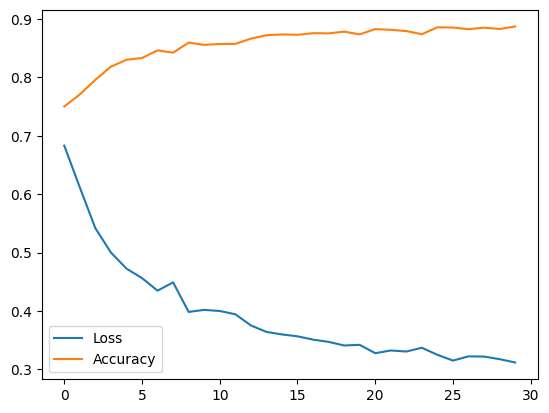

In [38]:
plt.plot(fashion_test_callback.losses, label="Loss")
plt.plot(fashion_test_callback.accuracies, label="Accuracy")
plt.legend()

### 3. Повторим предыдущий эксперимент, но начнём обучение не со случайных параметров, а с сохранённых в первом пункте.

#### Загрузим сохраненные параметры в модель и обучим её.

In [39]:
fashion_model_with_parameters = generate_model()
fashion_model_with_parameters.load_weights(SAVED_PARAMETERS)

with_parameters_test_callback = ValidationCallback(fashion_test_images, fashion_test_labels)

fashion_model_with_parameters.fit(
    fashion_train_images,
    fashion_train_labels,
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[with_parameters_test_callback]
)

Epoch 1/5
 78/469 [===>..........................] - ETA: 1:03 - loss: 1.0794 - accuracy: 0.6359
loss: 0.6503002643585205, accuracy: 0.7700999975204468
156/469 [========>.....................] - ETA: 1:01 - loss: 0.6063 - accuracy: 0.7871
loss: 0.5264474153518677, accuracy: 0.8123000264167786
234/469 [=============>................] - ETA: 49s - loss: 0.5055 - accuracy: 0.8194
loss: 0.4648837745189667, accuracy: 0.8352000117301941
312/469 [==================>...........] - ETA: 33s - loss: 0.4576 - accuracy: 0.8367
loss: 0.45294126868247986, accuracy: 0.838699996471405
390/469 [=======================>......] - ETA: 16s - loss: 0.4276 - accuracy: 0.8483
loss: 0.4126530885696411, accuracy: 0.8536999821662903
468/469 [============================>.] - ETA: 0s - loss: 0.4024 - accuracy: 0.8562
loss: 0.40762579441070557, accuracy: 0.8557000160217285
469/469 [==============================] - 108s 225ms/step - loss: 0.4076 - accuracy: 0.8557
Epoch 2/5
 78/469 [===>..........................

In [40]:
fashion_model_with_parameters.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_5 (Flatten)         (None, 576)              

#### Тестирование модели.

In [41]:
fashion_model_with_parameters.evaluate(fashion_test_images, fashion_test_labels, verbose=2)

313/313 - 3s - loss: 0.2977 - accuracy: 0.8939 - 3s/epoch - 11ms/step


[0.2976551651954651, 0.8938999772071838]

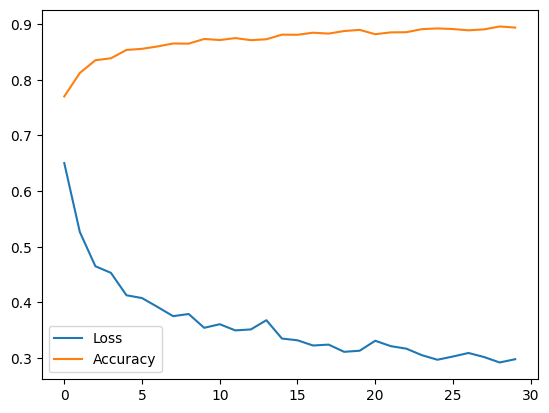

In [42]:
plt.plot(with_parameters_test_callback.losses, label="Loss")
plt.plot(with_parameters_test_callback.accuracies, label="Accuracy")
plt.legend()

### 4. Повторим предыдущий эксперимент, но заморозим параметры на свёрточных слоях.

#### После загрузки параметров заморозим свёрточные слои и обучим модель.

In [43]:
freeze_model = generate_model()

freeze_model.load_weights(SAVED_PARAMETERS)

for layer in freeze_model.layers:
    if isinstance(layer, tf.keras.layers.Conv2D):
        layer.trainable = False

freeze_test_callback = ValidationCallback(fashion_test_images, fashion_test_labels)

freeze_model.fit(
    fashion_train_images,
    fashion_train_labels,
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[freeze_test_callback]
)

Epoch 1/5
 78/469 [===>..........................] - ETA: 1:08 - loss: 1.0600 - accuracy: 0.6445
loss: 0.6459711194038391, accuracy: 0.766700029373169
156/469 [========>.....................] - ETA: 1:03 - loss: 0.5988 - accuracy: 0.7846
loss: 0.5160577893257141, accuracy: 0.819599986076355
234/469 [=============>................] - ETA: 47s - loss: 0.5027 - accuracy: 0.8214
loss: 0.4730444848537445, accuracy: 0.8317999839782715
312/469 [==================>...........] - ETA: 32s - loss: 0.4594 - accuracy: 0.8374
loss: 0.4562469720840454, accuracy: 0.8398000001907349
390/469 [=======================>......] - ETA: 16s - loss: 0.4405 - accuracy: 0.8440
loss: 0.4247439503669739, accuracy: 0.8495000004768372
468/469 [============================>.] - ETA: 0s - loss: 0.4013 - accuracy: 0.8565
loss: 0.40924474596977234, accuracy: 0.8564000129699707
469/469 [==============================] - 110s 227ms/step - loss: 0.4092 - accuracy: 0.8564
Epoch 2/5
 78/469 [===>..........................] 

In [44]:
freeze_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_6 (Flatten)         (None, 576)              

#### Тестирование модели.

In [45]:
freeze_model.evaluate(fashion_test_images, fashion_test_labels, verbose=2)

313/313 - 4s - loss: 0.3013 - accuracy: 0.8927 - 4s/epoch - 13ms/step


[0.30133795738220215, 0.8927000164985657]

#### Построим кривую обучения.

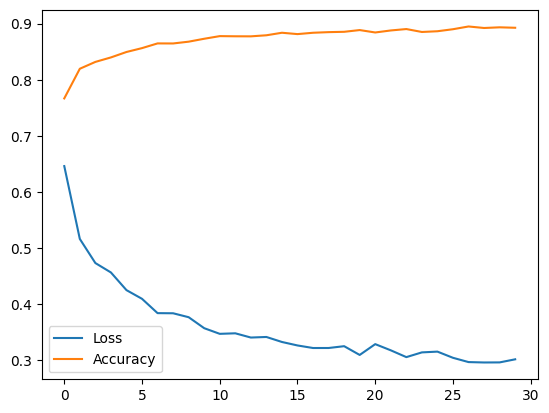

In [46]:
plt.plot(freeze_test_callback.losses, label="Loss")
plt.plot(freeze_test_callback.accuracies, label="Accuracy")
plt.legend()

### 5. Повторим предыдущий эксперимент, но после нескольких эпох разморозим и дообучим параметры.

#### Загрузим параметры в модель, заморозим свёрточные слои на 3 эпохи и обучим модель.

In [47]:
epochs = 3

freeze_unfreeze_model = generate_model()

freeze_unfreeze_model.load_weights(SAVED_PARAMETERS)

In [48]:
freeze_unfreeze_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_7 (Flatten)         (None, 576)              

In [49]:
for layer in freeze_unfreeze_model.layers:
    if isinstance(layer, tf.keras.layers.Conv2D):
        layer.trainable = False

freeze_unfreeze_test_callback = ValidationCallback(fashion_test_images, fashion_test_labels)

freeze_unfreeze_model.fit(
    fashion_train_images,
    fashion_train_labels,
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[freeze_unfreeze_test_callback]
)

Epoch 1/3
 78/469 [===>..........................] - ETA: 1:23 - loss: 1.0648 - accuracy: 0.6405
loss: 0.6488474011421204, accuracy: 0.76419997215271
156/469 [========>.....................] - ETA: 1:17 - loss: 0.6004 - accuracy: 0.7826
loss: 0.5449735522270203, accuracy: 0.8033000230789185
234/469 [=============>................] - ETA: 57s - loss: 0.5102 - accuracy: 0.8174
loss: 0.4723536968231201, accuracy: 0.8361999988555908
312/469 [==================>...........] - ETA: 39s - loss: 0.4579 - accuracy: 0.8395
loss: 0.43649888038635254, accuracy: 0.8463000059127808
390/469 [=======================>......] - ETA: 20s - loss: 0.4249 - accuracy: 0.8461
loss: 0.4180254340171814, accuracy: 0.852400004863739
468/469 [============================>.] - ETA: 0s - loss: 0.4055 - accuracy: 0.8582
loss: 0.3950968384742737, accuracy: 0.8614000082015991
469/469 [==============================] - 130s 268ms/step - loss: 0.3951 - accuracy: 0.8614
Epoch 2/3
 78/469 [===>..........................] -

#### Разморозим свёрточные сети и дообучим модель.

In [50]:
epochs = 5 - epochs
for layer in freeze_unfreeze_model.layers:
    if isinstance(layer, tf.keras.layers.Conv2D):
        layer.trainable = True

freeze_unfreeze_model.fit(
    fashion_train_images,
    fashion_train_labels,
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[freeze_unfreeze_test_callback]
)

Epoch 1/2
 78/469 [===>..........................] - ETA: 1:43 - loss: 0.2863 - accuracy: 0.8955
loss: 0.3187844157218933, accuracy: 0.8848999738693237
156/469 [========>.....................] - ETA: 1:20 - loss: 0.2994 - accuracy: 0.8903
loss: 0.3288130462169647, accuracy: 0.881600022315979
234/469 [=============>................] - ETA: 1:01 - loss: 0.3040 - accuracy: 0.8899
loss: 0.31623467803001404, accuracy: 0.8863000273704529
312/469 [==================>...........] - ETA: 38s - loss: 0.2925 - accuracy: 0.8934
loss: 0.31822866201400757, accuracy: 0.8848000168800354
390/469 [=======================>......] - ETA: 18s - loss: 0.3011 - accuracy: 0.8916
loss: 0.3071877062320709, accuracy: 0.8888999819755554
468/469 [============================>.] - ETA: 0s - loss: 0.2842 - accuracy: 0.8967
loss: 0.30510807037353516, accuracy: 0.8924000263214111
469/469 [==============================] - 108s 230ms/step - loss: 0.3051 - accuracy: 0.8924
Epoch 2/2
 78/469 [===>........................

#### Тестирование модели.

In [51]:
freeze_unfreeze_model.evaluate(fashion_test_images, fashion_test_labels, verbose=2)

313/313 - 3s - loss: 0.2937 - accuracy: 0.8955 - 3s/epoch - 10ms/step


[0.29369843006134033, 0.8955000042915344]

#### Построим кривую обучения.

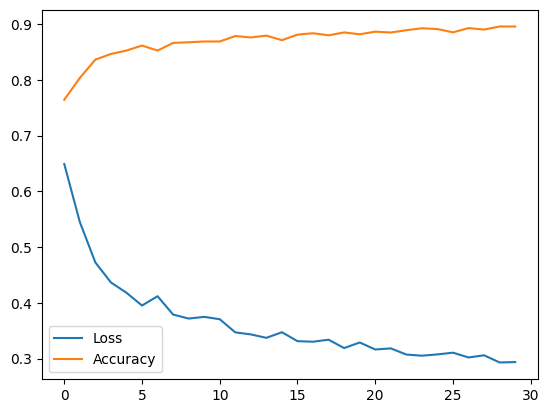

In [52]:
plt.plot(freeze_unfreeze_test_callback.losses, label="Loss")
plt.plot(freeze_unfreeze_test_callback.accuracies, label="Accuracy")
plt.legend()